#### For this project I have use two models. 
1. A model to predict Wine Quality score (a regression model)
2. A model to predict High Quality wines (those wines with quality >=7) vs Low quality (wines with quality < 7) (a classification model)

You can learn more about this dataset [here](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)

To do this, I have kept the following criteria in mind:
    1. Clarity of my code
    2. Clarity of my approach
    3. Model tuning and model selection
    4. Write up of my findings and data insights, i.e. clear interpretations.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import random
from sklearn import feature_selection
import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [2]:
White_Wine = pd.read_csv("/Users/praanshu/Desktop/SFSU/Data Mining/PPTs,data/winequality-white.csv", sep = ';', header = 1,names = ['fixed_acidity','volatile_acidity',
                                                       'citric_acid','residual_sugar','chlorides','free_sulfur_dioxide',
                                                       'total_sulfur_dioxide','density','pH',
                                                       'sulphates','alcohol','quality'])
White_Wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
2,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


# Section 1 - Regression

In [3]:
np.unique(White_Wine['quality'])

array([3, 4, 5, 6, 7, 8, 9])

In [4]:
White_Wine.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.022695,0.289175,0.088994,0.023087,-0.049418,0.091049,0.265397,-0.425883,-0.017131,-0.120856,-0.113668
volatile_acidity,-0.022695,1.000000,-0.149469,0.064386,0.070511,-0.097006,0.089278,0.027168,-0.031941,-0.035734,0.067708,-0.194721
citric_acid,0.289175,-0.149469,1.000000,0.094166,0.114367,0.094056,0.121106,0.149485,-0.163721,0.062347,-0.075683,-0.009215
residual_sugar,0.088994,0.064386,0.094166,1.000000,0.088777,0.299023,0.401359,0.838770,-0.193603,-0.026485,-0.450284,-0.097736
chlorides,0.023087,0.070511,0.114367,0.088777,1.000000,0.101400,0.198927,0.257371,-0.090463,0.016761,-0.360270,-0.209934
free_sulfur_dioxide,-0.049418,-0.097006,0.094056,0.299023,0.101400,1.000000,0.615470,0.294112,-0.000473,0.059261,-0.250000,0.008142
total_sulfur_dioxide,0.091049,0.089278,0.121106,0.401359,0.198927,0.615470,1.000000,0.529851,0.002511,0.134625,-0.448795,-0.174768
density,0.265397,0.027168,0.149485,0.838770,0.257371,0.294112,0.529851,1.000000,-0.093064,0.074702,-0.780062,-0.307360
pH,-0.425883,-0.031941,-0.163721,-0.193603,-0.090463,-0.000473,0.002511,-0.093064,1.000000,0.155889,0.121121,0.099478
sulphates,-0.017131,-0.035734,0.062347,-0.026485,0.016761,0.059261,0.134625,0.074702,0.155889,1.000000,-0.017536,0.053688


From the correlation matrix, alcohol, density and chlorides look somewhat correlated with the response variable. These three variables are also highly correlated with each other and with other variables, esp alcohol and density,and it would be advisable to not include them simultaneously in our model.

In [5]:
White_WineNew = preprocessing.scale(White_Wine) 
White_WineNew = pd.DataFrame(White_WineNew)   
White_WineNew.columns = White_Wine.columns.values
White_Wine = White_WineNew

/Users/praanshu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


In [6]:
#Using cross val and Lasso on our data to find which variables to eliminate

In [7]:
listOfAllVariables = White_Wine.columns.values
X = White_Wine[listOfAllVariables]
del X['quality']
y = White_Wine['quality']
print(listOfAllVariables)

['fixed_acidity' 'volatile_acidity' 'citric_acid' 'residual_sugar'
 'chlorides' 'free_sulfur_dioxide' 'total_sulfur_dioxide' 'density' 'pH'
 'sulphates' 'alcohol' 'quality']


[1.e-10 1.e-09 1.e-08 1.e-07 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01
 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06 1.e+07 1.e+08 1.e+09
 1.e+10] [0.7341653961215748, 0.7341653955345424, 0.7341653896653222, 0.7341653309724594, 0.7341647442492715, 0.7341588868626137, 0.7341012644078062, 0.7336581228256465, 0.7348521027901083, 0.7845354367513522, 1.0040742759734302, 1.0040742759734302, 1.0040742759734302, 1.0040742759734302, 1.0040742759734302, 1.0040742759734302, 1.0040742759734302, 1.0040742759734302, 1.0040742759734302, 1.0040742759734302, 1.0040742759734302]


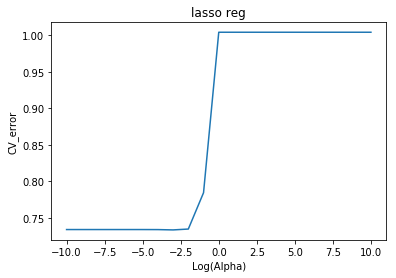

In [8]:
MSE_Lasso_CV=[]

CV_score=[]

alphas = np.logspace(-10,10,21)
alphas_index = np.linspace(-10,10,21)

for a in alphas:
    lm= linear_model.Lasso(alpha= a)
    CV_score.append(-cross_val_score(lm,X,y, cv=10, scoring= 'neg_mean_squared_error').mean())
    

print(alphas, CV_score)


plt.plot(alphas_index, CV_score)
plt.xlabel ("Log(Alpha)")
plt.ylabel("CV_error")
plt.title("lasso reg")
plt.show()

In [9]:
##MSE is flat up to log_alpha = -2.5 Log_alpha results in alpha = 0.01 (due to its logarithmic scale) 

lm = linear_model.Lasso(alpha=0.01)
lm.fit(X, y)
print(lm.coef_,X.columns)

[-0.         -0.21145815 -0.          0.25813688 -0.01282142  0.0611094
 -0.00219867 -0.21346591  0.05561081  0.05403776  0.3936202 ] Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


Based on above output from Lasso, we decide to exclude:
1) fixed_acidity
2) citric_acid

In [10]:
X1 = White_Wine[['alcohol']]
X2 = White_Wine[['alcohol','volatile_acidity']]
X3 = White_Wine[['pH','sulphates']]
X4 = White_Wine[['density','pH','sulphates']]
X5 = White_Wine[['alcohol','volatile_acidity','pH','sulphates']]
X6 = White_Wine[['alcohol','volatile_acidity','pH','sulphates','free_sulfur_dioxide']]
X7 = White_Wine[['sulphates','pH','volatile_acidity']]
X8 = White_Wine[['sulphates','pH','volatile_acidity','residual_sugar']]#'alcohol' is highly correlated with density so cannot consider them simoltanously
X9 = White_Wine[['chlorides','volatile_acidity','residual_sugar','free_sulfur_dioxide']]
X10 = White_Wine[['chlorides','density','volatile_acidity','residual_sugar']]
X11 = White_Wine[['chlorides','density','volatile_acidity','total_sulfur_dioxide']] #total_sulphur_dioxide is highly correlated with residual sugar


X12 = White_Wine[['alcohol','density','chlorides']]  #model without that much interpretability ;  
X13 = White_Wine[['alcohol','density','chlorides','sulphates']]  #model without that much interpretability
X14 = White_Wine[['alcohol','density','chlorides','total_sulfur_dioxide']]  #model without that much interpretability
X15 = White_Wine[['volatile_acidity','residual_sugar','free_sulfur_dioxide',
                  'density','pH','sulphates','alcohol']]
X16 = White_Wine[['volatile_acidity','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide',
                  'density','pH','sulphates','alcohol']]  #model without that much interpretability
y = White_Wine['quality']
lm = LinearRegression()


[0.8135214691428752, 0.7632979852025213, 0.9979977095564683, 0.9030522386919186, 0.7626608950485589, 0.7546123551783377, 0.9615239008718236, 0.9577099013040916, 0.9251650811142916, 0.7813769503278418, 0.8599765010755863, 0.8095964574066414, 0.8082458344905479, 0.8102747905189354, 0.7315793954621818, 0.7319219101478512]


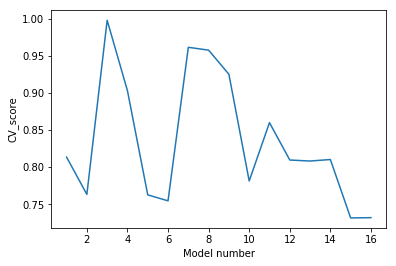

In [11]:
# Using 10 fold cross-validation to decide on the model of your interest

CV_score= []
for i in [X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16]:
    CV_score.append(-cross_val_score(lm,i,y,cv=10,scoring="neg_mean_squared_error").mean())

print(CV_score)    

idx= np.array(range(16))+1
plt.plot(idx,CV_score)
plt.xlabel("Model number")
plt.ylabel("CV_score")
plt.show()


In [12]:
#Since our goal is prediction, we will most likely use models with least CV MSE and significant p values. 

In [13]:
for i in [X2,X5,X6,X10,X15,X16]:
    lm1 = smf.ols(formula='y ~ i', data=White_Wine).fit()
    print(lm1.pvalues)

Intercept     1.000000e+00
i[0]         2.215086e-253
i[1]          1.785196e-70
dtype: float64
Intercept     1.000000e+00
i[0]         1.056213e-247
i[1]          6.803372e-69
i[2]          1.625888e-02
i[3]          1.071761e-04
dtype: float64
Intercept     1.000000e+00
i[0]         1.920545e-261
i[1]          1.161106e-64
i[2]          2.373146e-02
i[3]          4.824476e-04
i[4]          1.103005e-15
dtype: float64
Intercept     1.000000e+00
i[0]          1.238939e-04
i[1]         8.322006e-186
i[2]          5.119959e-58
i[3]         4.112534e-110
dtype: float64
Intercept    1.000000e+00
i[0]         3.181993e-69
i[1]         1.188039e-34
i[2]         1.265611e-06
i[3]         6.778788e-18
i[4]         1.548905e-09
i[5]         7.390426e-09
i[6]         3.308110e-38
dtype: float64
Intercept    1.000000e+00
i[0]         6.010399e-64
i[1]         5.692701e-32
i[2]         3.425799e-01
i[3]         9.104337e-06
i[4]         3.931709e-01
i[5]         1.149296e-15
i[6]         3.065515e

### We will choose model 15 as it has all significant values and MSE is low, since our goal is prediction and interpretibility does not matter.

In [14]:
X= White_Wine[['volatile_acidity','residual_sugar','free_sulfur_dioxide',
                  'density','pH','sulphates','alcohol']]
y = White_Wine['quality']


In [15]:
linreg = LinearRegression()
linreg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
print(linreg.coef_)

[-0.22071662  0.3794892   0.06306946 -0.37213619  0.07879781  0.07357027
  0.33874746]


### Interpretibility

This model suggests that 
1) Keeping everything constant, a unit increase in volatile_acidity causes on average, the wine quality to reduce by 0.22 units
2) Keeping everything constant, a unit increase in residual sugar causes on average, the wine quality to increase by 0.379 units
3) Keeping everything fixed, a unit increase in free_sulphur_dioxide causes on avergae, the wine quality to increase by 0.06 units
4) Keeping everything fixed, a unit increase in density causes on average, the wine quality to decrease by 0.37 units
5) Keeping everything fixed, a unit increase in pH causes on average, the wine quality to increase by 0.07 units
6) Keeping everything fixed, a unit increase in sulphates causes on avergae, the wine quality to increase by 0.07 units
7) Keeping everything fixed, a unit increase in free_sulphur_dioxide causes on avergae, the wine quality to increase by 0.33 units

## Note: 
Since our goal to select this model was predictability over interpretibility, many features included in the final model are correlated with each other (like density and residual sugar). We therefore cannot make solid interpretations from this model. This model should only be used for interpretation.

# Section 2 - Classification

In [17]:
# add as many boxes as you want

In [18]:
White_Wine = pd.read_csv("/Users/praanshu/Desktop/SFSU/Data Mining/PPTs,data/winequality-white.csv", sep = ';', header = 1,names = ['fixed_acidity','volatile_acidity',
                                                       'citric_acid','residual_sugar','chlorides','free_sulfur_dioxide',
                                                       'total_sulfur_dioxide','density','pH',
                                                       'sulphates','alcohol','quality'])
White_Wine['quality_category'] = np.where(White_Wine['quality'] >=7,"High","Low")


In [19]:
White_Wine_quality_Num = pd.get_dummies(White_Wine['quality_category'], prefix='quality')

In [20]:
del White_Wine_quality_Num['quality_High']
White_Wine = pd.concat([White_Wine,White_Wine_quality_Num], axis=1)
White_Wine.head(20)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_category,quality_Low
0,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,Low,1
1,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,Low,1
2,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Low,1
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Low,1
4,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,Low,1
5,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,Low,1
6,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,Low,1
7,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,Low,1
8,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,Low,1
9,8.1,0.27,0.41,1.45,0.033,11.0,63.0,0.9908,2.99,0.56,12.0,5,Low,1


In [21]:
#Using statsmodel

White_Wine['Intercept'] = 1
X1 = White_Wine[['Intercept','fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide',
                  'density','pH','sulphates','alcohol']]
y1 = White_Wine['quality_Low']

logit = smf.Logit(y1, X1)
result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 8.538759
         Iterations 9


/Users/praanshu/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/praanshu/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/praanshu/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:3313: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            quality_Low   No. Observations:                 4897
Model:                          Logit   Df Residuals:                     4885
Method:                           MLE   Df Model:                           11
Date:                Wed, 25 Nov 2020   Pseudo R-squ.:                     inf
Time:                        16:19:44   Log-Likelihood:                -41814.
converged:                       True   LL-Null:                        0.0000
                                        LLR p-value:                     1.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             -635.9155     94.114     -6.757      0.000    -820.375    -451.456
fixed_acidity           -0.5518      0.091     -6.096      0.000      -0.729      -0.374
volatile_acidity         3.7849      0.488      7.749      0.000       2.828       4.742
citric_acid              0.7376      0.401      1.840      0.066      -0.048       1.523
residual_sugar          -0.2952      0.036     -8.283      0.000      -0.365      -0.225
chlorides               12.6452      3.817      3.313      0.001       5.165      20.126
free_sulfur_dioxide     -0.0086      0.003     -2.762      0.006      -0.015      -0.003
total_sulfur_dioxide     0.0003      0.002      0.180      0.857      -0.003       0.003
density                658.8274     95.393      6.906      0.000     471.860     845.795
pH                      -3.3415      0.427     -7.828      0.000      -4.178      -2.505
sulphates               -2.1674      0.347     -6.237      0.000      -2.848      -1.486
alcohol                 -0.1425      0.114     -1.252      0.211      -0.366       0.081
========================================================================================
"""

### Interpretation
From above, citric_acid, total_sulphur_dioxide and alcohol appear insignificant. 

We see that with a unit increase in volatile_acidity, the odds of quality being low increase by 3.8% 
Similarly, with a unit increase in chlorides, the odds of quality being low increase by 1264%, suggesting that high quality wines should have low amount of chlorides. 

Density again suggests that with a unit increase in density, the odds of quality being low increase by 658.8 *100%. However, we noticed previously that both density and chlorides were highly correlated, so we should not have included both these variables together as it harms the interpretibility of the model.

In [22]:
X =  White_Wine[['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide',
                  'density','pH','sulphates','alcohol']]
y =  White_Wine['quality_Low']

In [23]:
lm = LogisticRegression(solver = 'liblinear', max_iter = 10000)

print("Accuracy with 10 fold CV for liblinear is %f" %cross_val_score(lm, X , y, cv=10, scoring = 'accuracy').mean())


Accuracy with 10 fold CV for liblinear is 0.795793


In [29]:
lm.fit(X, y)


y_hat_liblinear = lm.predict(X)
print(confusion_matrix(y, y_hat_liblinear))

[[ 297  763]
 [ 208 3629]]


In [30]:
## Looks like our true positives are high. 
## We will now standardize our data for applying KNN algorithms.

In [31]:
def Standardize(X):
    X_Max = X.max()
    X_Min = X.min()
    X_Standardized = (X-X_Min)/(X_Max - X_Min)
    return X_Standardized

NameOfVariables = ['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide',
                  'density','pH','sulphates','alcohol']
for i in NameOfVariables:
    White_Wine[i] = Standardize(White_Wine[i])
    
X = White_Wine[['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide',
                  'density','pH','sulphates','alcohol']] 

#### Using 10-fold cross validation to find the best tuning parameter - C using 'liblinear' and l1 penalty

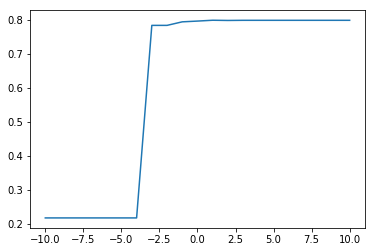

Our optimal C is 10.000000
Our accuracy at optimal C is 0.798651


In [32]:

c_list = np.logspace(-10,10,21) 
c_index = np.linspace(-10,10,21)

cv_scores = []
for c_score in c_list:
    lm = LogisticRegression(C = c_score,  solver = 'liblinear', max_iter  = 10000, penalty = 'l1')
    cv_scores.append(cross_val_score(lm, X, y,cv = 10, scoring = 'accuracy').mean())

plt.plot(c_index, cv_scores)
plt.show()

print("Our optimal C is %f" %c_list[np.argmax(cv_scores)])   
print("Our accuracy at optimal C is %f" %np.max(cv_scores))

#### Localizing search

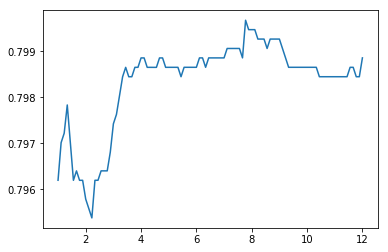

Our optimal C is 7.777778
Our accuracy at optimal C is 0.799672


In [33]:
c_list = np.linspace(1,12,100) 
cv_scores = []
for c_score in c_list:
    lm = LogisticRegression(C = c_score,  solver = 'liblinear', max_iter  = 10000, penalty = 'l1')
    cv_scores.append(cross_val_score(lm, X, y,cv = 10, scoring = 'accuracy').mean())

plt.plot(c_list, cv_scores)
plt.show()

print("Our optimal C is %f" %c_list[np.argmax(cv_scores)])   
print("Our accuracy at optimal C is %f" %np.max(cv_scores))

In [34]:
lm = LogisticRegression(C = 7.77,  solver = 'liblinear', max_iter  = 50000, penalty = 'l1')
lm.fit(X,y)
print(lm.coef_)


[[ -4.94579938   3.83174188   1.17353142 -17.05958657   4.31502882
   -2.49796581   0.21888746  29.54472885  -3.31771804  -1.74289345
   -1.47431319]]


In [35]:
Var_coef = zip(lm.coef_[0,:],X.columns.values)
print(list(Var_coef))

[(-4.945799377885714, 'fixed_acidity'), (3.831741876855318, 'volatile_acidity'), (1.1735314205588507, 'citric_acid'), (-17.059586571461303, 'residual_sugar'), (4.315028818079611, 'chlorides'), (-2.497965806937701, 'free_sulfur_dioxide'), (0.21888746149275504, 'total_sulfur_dioxide'), (29.54472884663954, 'density'), (-3.317718038635546, 'pH'), (-1.74289344962762, 'sulphates'), (-1.4743131894584334, 'alcohol')]


#### Findings

From our regression effort, I tried to find the best model that describes the response (quality of wines), by using Lasso regression. This helped in shrinkage of our model coefficients to an extent. I then fit regression on different models to find the one with the least CV MSE since our goal was prediction. 

From the classification exercise, I see that no coefficient is being dropped in the final model for classification. Earlier, statsmodel suggested that we should have dropped Total_sulfur_dioxide, citric_acid and alcohol as they had high p value.
